In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
# Read csv file containing training datadata
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv")
# Print first 5 rows
print(f'There are {dataset.shape[0]} rows and {dataset.shape[1]} columns in this data frame')
dataset.head()

There are 45730 rows and 10 columns in this data frame


,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


### Attribute Information:

RMSD-Size of the residue:
* F1 - Total surface area.
* F2 - Non polar exposed area.
* F3 - Fractional area of exposed non polar residue.
* F4 - Fractional area of exposed non polar part of residue.
* F5 - Molecular mass weighted exposed area.
* F6 - Average deviation from standard exposed area of residue.
* F7 - Euclidian distance.
* F8 - Secondary structure penalty.
* F9 - Spacial Distribution constraints (N,K Value).

<AxesSubplot:>

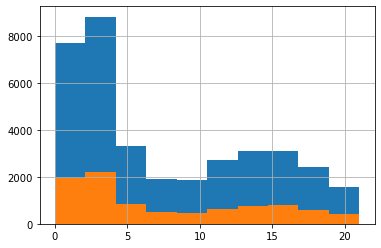

In [3]:
train,test = train_test_split(dataset, test_size=0.2, random_state=42)

train["RMSD"].hist();
display(test["RMSD"].hist());

In [4]:
display(train.info())
train.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36584 entries, 41068 to 15795
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    36584 non-null  float64
 1   F1      36584 non-null  float64
 2   F2      36584 non-null  float64
 3   F3      36584 non-null  float64
 4   F4      36584 non-null  float64
 5   F5      36584 non-null  float64
 6   F6      36584 non-null  float64
 7   F7      36584 non-null  float64
 8   F8      36584 non-null  int64  
 9   F9      36584 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.1 MB


None

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,3.658400e+04,36584.000000,36584.000000,36584.000000,36584.000000
mean,7.752224,9871.945018,3018.527681,0.302463,103.525247,1.368336e+06,145.704511,3982.135154,69.806172,34.523923
std,6.114240,4055.195024,1465.414199,0.063022,55.490411,5.634461e+05,70.069590,1862.712491,56.251340,5.979687
min,0.000000,2392.050000,411.310000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.312300
25%,2.310750,6934.780000,1981.172500,0.258487,63.560900,9.530307e+05,94.834300,3164.822500,31.000000,30.423125
50%,5.034000,8909.515000,2671.705000,0.300245,87.867400,1.238433e+06,126.256000,3840.260000,54.000000,35.289950
75%,13.382000,12137.300000,3791.330000,0.343150,133.693000,1.691638e+06,181.764750,4642.942500,90.000000,38.869300
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105476.800000,350.000000,55.300900


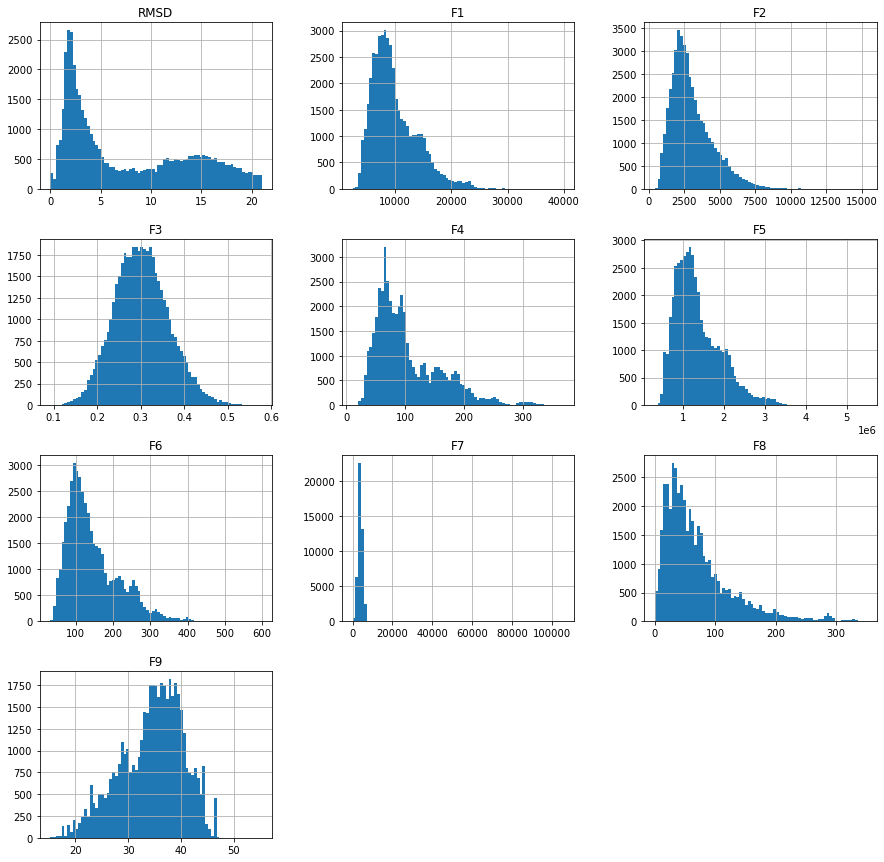

In [5]:
%matplotlib inline 
dataset.hist(bins=75, figsize=(15,15))
plt.show()

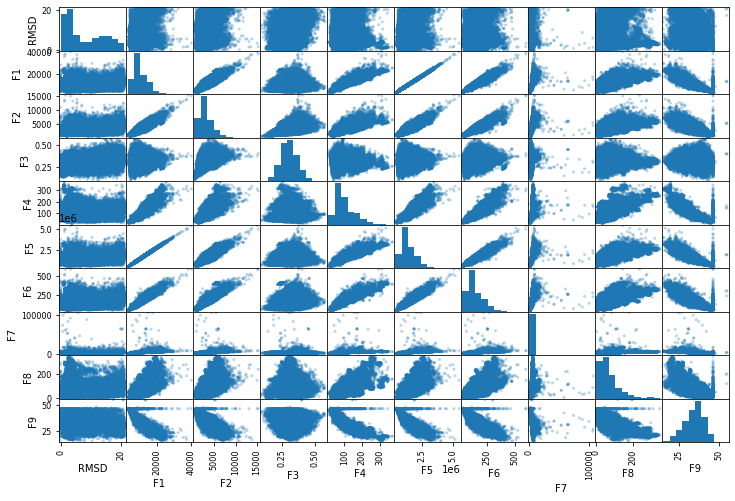

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize=(12, 8),alpha=0.3);

In [7]:
# not clear distiction for RMSD and related

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score,RepeatedKFold,cross_validate

cv = RepeatedKFold(n_splits=10, random_state=7,n_repeats=25)
scoring=["neg_mean_absolute_error","neg_mean_squared_error"]
cv_fast=RepeatedKFold(n_splits=10, random_state=7,n_repeats=3)
X_train=train.iloc[:,1:]
y_train=train.iloc[:,0]

In [9]:
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler().fit(X_train)# do not use standardScaler since F1, F2 and F7 is very sparse
X_scaled=scaler.transform(X_train)

In [10]:
from sklearn.linear_model import TweedieRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
model_list=[TweedieRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),BayesianRidge()]


In [11]:
%%time
lin_score=cross_validate(TweedieRegressor(), X_scaled,y_train , cv=cv,scoring=scoring)
print(f"The score for linearRegressor are: RMSE: {lin_score['test_neg_mean_squared_error'].mean()}  MAE: {lin_score['test_neg_mean_absolute_error'].mean()} ")

The score for linearRegressor are: RMSE: -37.19240768775523  MAE: -5.474093128453019 
CPU times: user 38.3 s, sys: 33.6 s, total: 1min 11s
Wall time: 9.01 s


In [12]:
%%time
cart_score=cross_validate(DecisionTreeRegressor(random_state=32), X_scaled,y_train , cv=cv,scoring=scoring)
print(f"The score for DecisionTreeRegressor are: MSE: {cart_score['test_neg_mean_squared_error'].mean()}  MAE: {cart_score['test_neg_mean_absolute_error'].mean()} ")

The score for DecisionTreeRegressor are: RMSE: -25.530514734181494  MAE: -2.9266004924719824 
CPU times: user 1min 48s, sys: 434 ms, total: 1min 49s
Wall time: 1min 48s


In [13]:
%%time
knn_score=cross_validate(KNeighborsRegressor(), X_scaled,y_train , cv=cv,scoring=scoring)
print(f"The score for KNeighborsRegressor are: MSE: {knn_score['test_neg_mean_squared_error'].mean()}  MAE: {knn_score['test_neg_mean_absolute_error'].mean()} ")

The score for KNeighborsRegressor are: RMSE: -15.261068064414811  MAE: -2.4891663816278715 
CPU times: user 44.1 s, sys: 5.63 ms, total: 44.1 s
Wall time: 44.1 s


In [14]:
%%time
rf_score=cross_validate(RandomForestRegressor(random_state=422), X_scaled,y_train , cv=cv_fast,scoring=scoring,n_jobs=4)
print(f"The score for RandomForestRegressor are: MSE: {rf_score['test_neg_mean_squared_error'].mean()}  MAE: {rf_score['test_neg_mean_absolute_error'].mean()} ")

The score for RandomForestRegressor are: RMSE: -12.616388332899742  MAE: -2.408486930373735 
CPU times: user 273 ms, sys: 99 ms, total: 372 ms
Wall time: 5min 20s


In [15]:
%%time
svr_score=cross_validate(SVR(), X_scaled,y_train , cv=cv_fast,scoring=scoring,n_jobs=4)
print(f"The score for SVR are: MSE: {svr_score['test_neg_mean_squared_error'].mean()}  MAE: {svr_score['test_neg_mean_absolute_error'].mean()} ")

The score for SVR are: RMSE: -25.79952070968274  MAE: -3.8460945741064703 
CPU times: user 1.27 s, sys: 406 ms, total: 1.68 s
Wall time: 43min 21s


In [16]:
%%time
bayes_score=cross_validate(BayesianRidge(), X_scaled,y_train , cv=cv_fast,scoring=scoring)
print(f"The score for BayesianRidge are: MSE: {bayes_score['test_neg_mean_squared_error'].mean()}  MAE: {bayes_score['test_neg_mean_absolute_error'].mean()} ")

The score for BayesianRidge are: RMSE: -26.74358962238023  MAE: -4.3299228674627575 
CPU times: user 8.93 s, sys: 13.5 s, total: 22.5 s
Wall time: 2.94 s


In [17]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
#grid RandomForest

from sklearn.model_selection import GridSearchCV
rf_parameters={"min_samples_leaf":[1,2,3,4,5],"min_samples_split":[2,3,4,5]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=422), rf_parameters,scoring="neg_mean_absolute_error",n_jobs=8)
rf_grid.fit(X_scaled,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=422), n_jobs=8,
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='neg_mean_absolute_error')

In [19]:
rf_grid_result=pd.DataFrame(rf_grid.cv_results_)
rf_grid_result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_leaf', 'param_min_samples_split', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

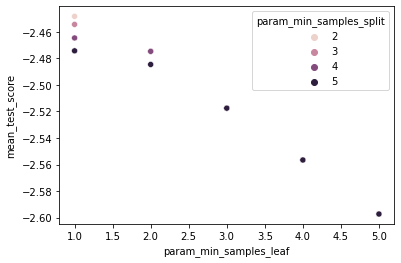

In [20]:
sns.scatterplot(x="param_min_samples_leaf", y="mean_test_score", data=rf_grid_result,hue="param_min_samples_split");

In [21]:
#grid searchKNeighborsRegressor

from sklearn.model_selection import GridSearchCV
knn_parameters={"n_neighbors":[2,3,4,5],"leaf_size":[10,20,30,50,100],"algorithm":['ball_tree', 'kd_tree', 'brute'],"weights" : ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_parameters,scoring="neg_mean_absolute_error")
knn_grid.fit(X_scaled,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 50, 100],
                         'n_neighbors': [2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')

In [22]:
grid_result=pd.DataFrame(knn_grid.cv_results_)
grid_result.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_algorithm', 'param_leaf_size', 'param_n_neighbors',
       'param_weights', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [23]:
knn_grid.best_estimator_.get_params()

{'algorithm': 'kd_tree',
 'leaf_size': 10,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

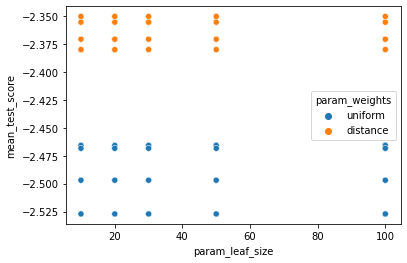

In [24]:
sns.scatterplot(x="param_leaf_size", y="mean_test_score", data=grid_result,hue="param_weights");

In [25]:
knn_fit=KNeighborsRegressor(weights='distance', n_neighbors=3,leaf_size=10,algorithm='kd_tree').fit(X_scaled,y_train)

In [26]:
X_test=test.iloc[:,1:]
y_test=test.iloc[:,0]

X_test_scaled=scaler.transform(X_test)#same as Train

knn_y_pred=knn_fit.predict(X_test_scaled)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f"The MAE is {mean_absolute_error(y_test,knn_y_pred)} and the RMSE is {mean_squared_error(y_test,knn_y_pred)}")

The MAE is 2.3358786098259317 and the RMSE is 15.404824313361797


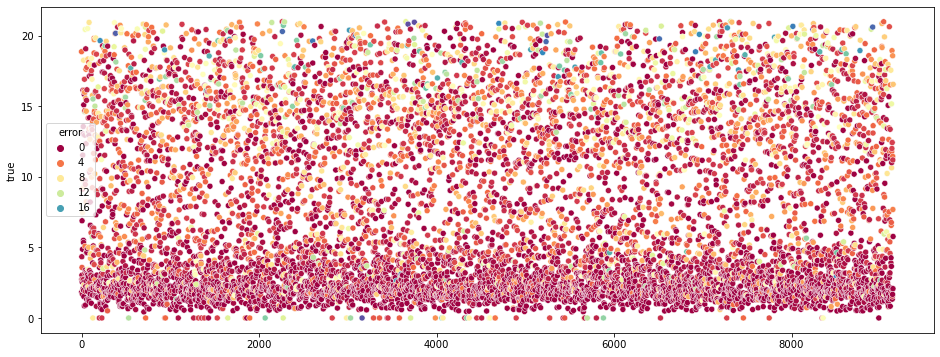

In [32]:
check_results=pd.DataFrame({"true":y_test,"pred":knn_y_pred,"error":abs(y_test-knn_y_pred)})
plt.figure(figsize=(16, 6))
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.scatterplot(x=range(len(y_test)),data=check_results,y="true",hue="error",palette=cmap);

bigger error on the middle range, between ranges

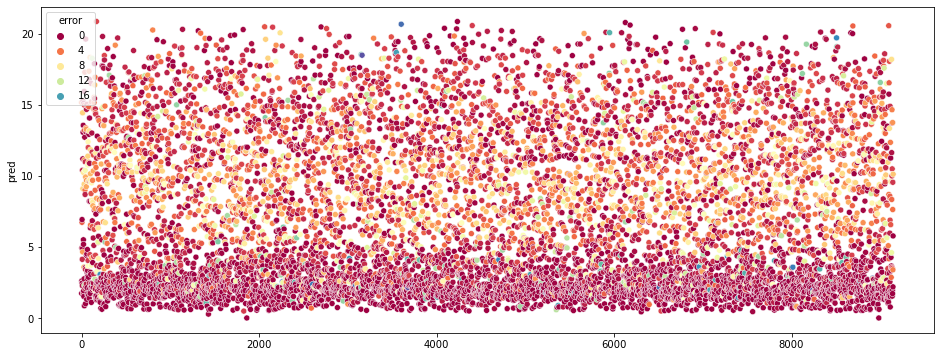

In [34]:
plt.figure(figsize=(16, 6))
cmap=sns.color_palette("Spectral", as_cmap=True)
sns.scatterplot(x=range(len(y_test)),data=check_results,y="pred",hue="error",palette=cmap);

## Getting prediction error

In [29]:
from scipy import stats
def get_prediction_interval(prediction, y_test, test_predictions, pi=.95):
    '''
    Get a prediction interval for a linear regression.
    
    INPUTS: 
        - Single prediction, 
        - y_test
        - All test set predictions,
        - Prediction interval threshold (default = .95) 
    OUTPUT: 
        - Prediction interval for single prediction
    '''
    
    #get standard deviation of y_test
    sum_errs = np.sum((y_test - test_predictions)**2)
    stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)
#get interval from standard deviation
    one_minus_pi = 1 - pi
    ppf_lookup = 1 - (one_minus_pi / 2)
    z_score = stats.norm.ppf(ppf_lookup)
    interval = z_score * stdev
#generate prediction interval lower and upper bound
    lower, upper = prediction - interval, prediction + interval
    print(interval)
    return lower, prediction, upper
get_prediction_interval(15, y_test, knn_y_pred)#15 example prediction

7.6934999571231


(7.3065000428769, 15, 22.6934999571231)

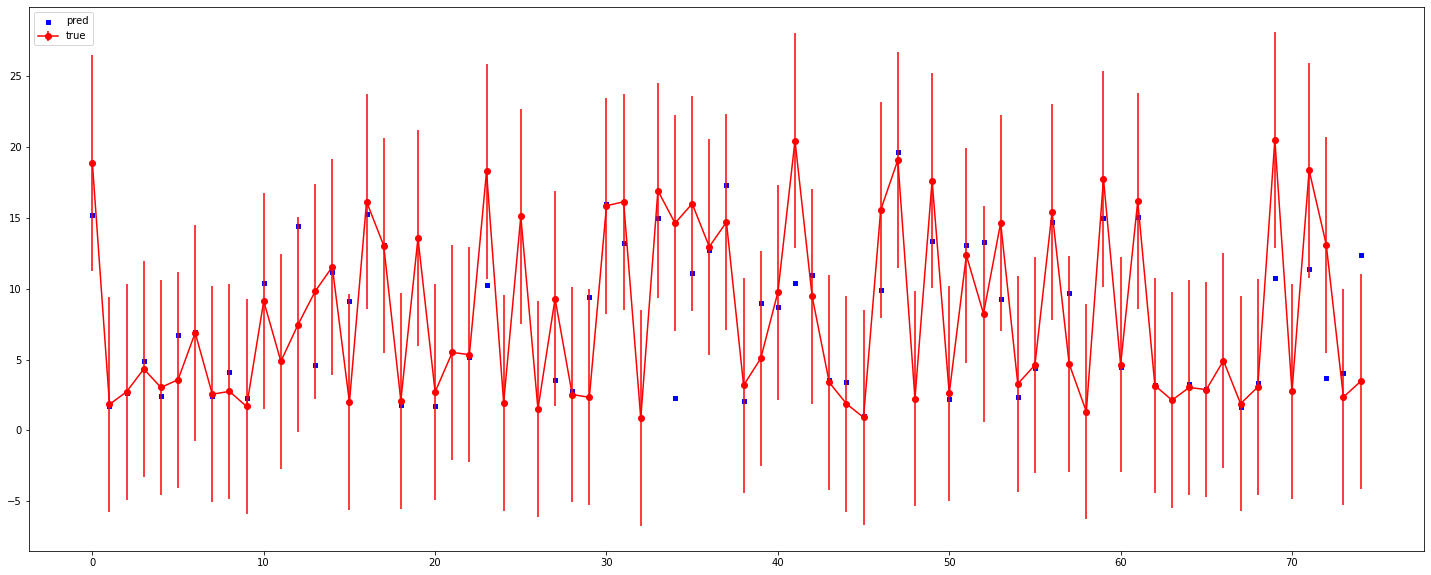

In [52]:
fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(y_test))[0:75], check_results["pred"][0:75], s=10, c='b', marker="s", label='pred')
ax1.errorbar(range(len(y_test))[0:75],check_results["true"][0:75],yerr=7.6,  c='r', marker="o", label='true')
plt.legend(loc='upper left');
plt.show()